# Pymaceuticals Inc. - Analysis

The data from **Pymaceuticals Inc.** compares the effectiveness of different drug regimens on mice with **squamous cell carcinoma (SCC)**. After cleaning the data and performing the necessary steps, the analysis reveals the following insights:

---

## Summary Statistics:

- **Capomulin** demonstrated the **lowest average tumor volume** across all drug regimens, suggesting it may be the most effective treatment for tumor reduction.
- The **variance** and **standard deviation** for **Capomulin** and **Ramicane** were **relatively low**, indicating that these treatments produced **more consistent results** compared to other regimens.
- On the other hand, **Infubinol** and **Ceftamin** showed **higher variance**, which indicates **greater variation in tumor volumes**. This variability may suggest inconsistent results or the presence of outliers.

---

## Data Cleaning:

- The dataset was **cleaned** by removing **duplicate mice** based on **Mouse ID** and **Timepoint**. Initially, there were **249 unique mice**, but after removing the duplicates, the dataset has **248 unique mice**, ensuring that each mouse is counted only once in the study.
- All the duplicates were properly identified and removed, ensuring the integrity of the dataset.

---

## Visualizations:

- The **bar and pie charts** displayed a **balanced distribution of male and female mice** across the treatments, which is important for avoiding any bias in the analysis based on gender.
- The **box plot** showed that **Capomulin** had the **least variation in tumor volume**, suggesting it was the most consistent treatment. However, **outliers** were observed, indicating that some mice may have responded unusually to the treatment.

---

## Outliers:

- **Outliers** were identified for some drug regimens, particularly for **Infubinol** and **Ramicane**. These outliers had unusually **high tumor volumes**, suggesting that **further investigation** is needed to understand why certain mice showed such drastic responses to the treatments. This could be a **potential indication of non-responsiveness or other biological factors** at play.

---

## Regression Analysis:

- A **moderate positive correlation** was observed between **mouse weight and tumor volume** for the **Capomulin** regimen. This suggests that **heavier mice** tended to have **larger tumors**, but the relationship is not strong enough to conclude a direct causal relationship. Further research would be needed to fully understand how weight might affect tumor growth.

---

## Conclusion:

- Based on this analysis, **Capomulin** appears to be the **most effective treatment** with the **lowest tumor volume** and the **least variation** in results.
- While some **outliers** were observed in other drug regimens, further analysis is necessary to better understand their causes.
- The **moderate correlation between mouse weight and tumor volume** for Capomulin suggests an interesting trend, but more investigation is needed to confirm any causality.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "D:/module-5/data/Mouse_metadata.csv"
study_results_path = "D:/module-5/data/Study_results.csv"



In [3]:
# Load the dataset
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the first few rows of the mouse metadata to confirm it's loaded
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Remove any extra spaces or formatting issues from all columns
mouse_metadata.columns = mouse_metadata.columns.str.strip()  # Removes extra spaces from column names
study_results.columns = study_results.columns.str.strip()  # Same for the study results data

# Check the first few rows to confirm no extra spaces
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of unique mice
unique_mice = combined_data["Mouse ID"].nunique()

# Display the number of unique mice
unique_mice



249

In [7]:
# Identify duplicate mice by Mouse ID and Timepoint
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate rows
duplicates



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Remove all instances of the duplicate mouse (e.g., Mouse ID "g989").
# Replace "g989" with the actual Mouse ID that you identified in the duplicates list.
combined_data_cleaned = combined_data[combined_data["Mouse ID"] != "g989"]

# Check the number of unique mice after removing duplicates
cleaned_unique_mice = combined_data_cleaned["Mouse ID"].nunique()
print(f"Cleaned dataset unique mice count: {cleaned_unique_mice}")

# Display the cleaned data to confirm duplicates are removed
combined_data_cleaned.head()



Cleaned dataset unique mice count: 248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = combined_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
)

# Display the summary statistics
summary_stats




,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using aggregation to generate the summary statistics in a single line
summary_stats_advanced = combined_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean", 
    median="median", 
    variance="var", 
    std_dev="std", 
    sem="sem"
)

# Display the advanced summary statistics
summary_stats_advanced


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

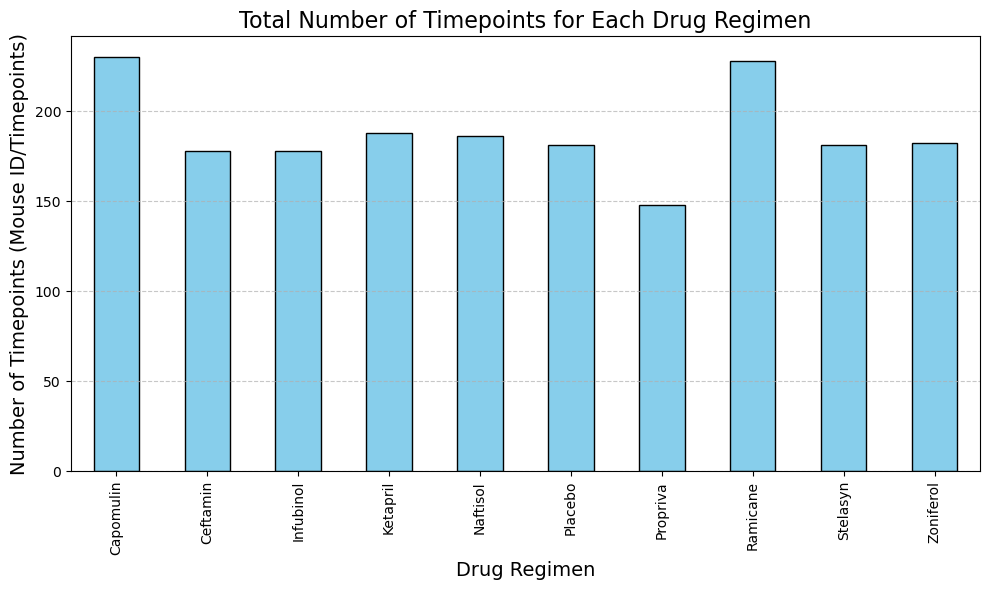

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
bar_plot = combined_data_cleaned.groupby("Drug Regimen")["Mouse ID"].count().plot(
    kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black'
)

# Set the plot labels and title with font size adjustments for clarity
bar_plot.set_xlabel("Drug Regimen", fontsize=14)
bar_plot.set_ylabel("Number of Timepoints (Mouse ID/Timepoints)", fontsize=14)
bar_plot.set_title("Total Number of Timepoints for Each Drug Regimen", fontsize=16)

# Add a grid for better readability
bar_plot.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjusts layout to ensure everything fits without overlap
plt.show()




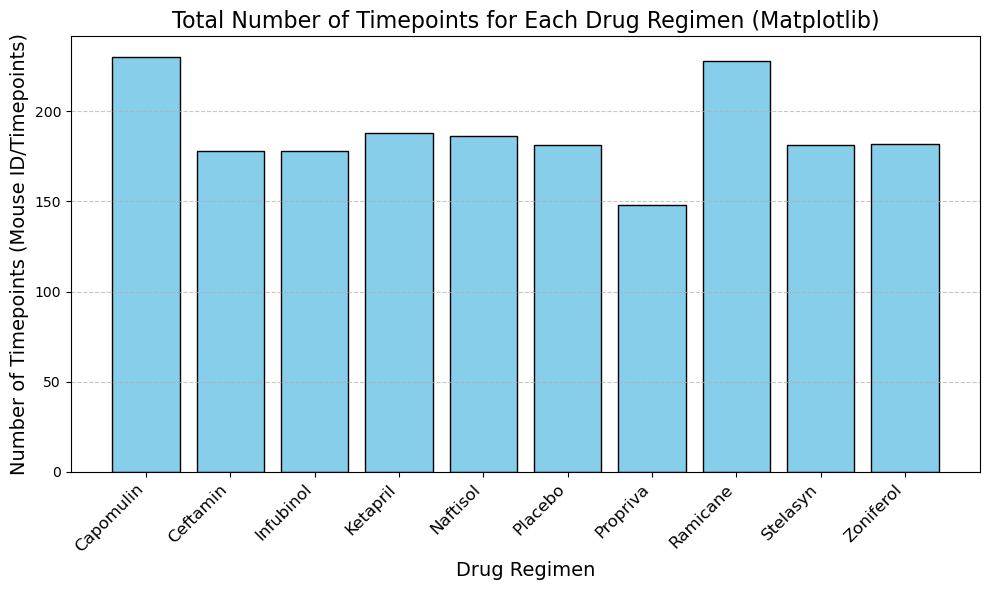

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(combined_data_cleaned.groupby("Drug Regimen")["Mouse ID"].count().index, 
        combined_data_cleaned.groupby("Drug Regimen")["Mouse ID"].count(), 
        color='skyblue', edgecolor='black')

# Set labels and title with appropriate font sizes
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Timepoints (Mouse ID/Timepoints)", fontsize=14)
plt.title("Total Number of Timepoints for Each Drug Regimen (Matplotlib)", fontsize=16)

# Add a grid to the y-axis for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-ticks for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()



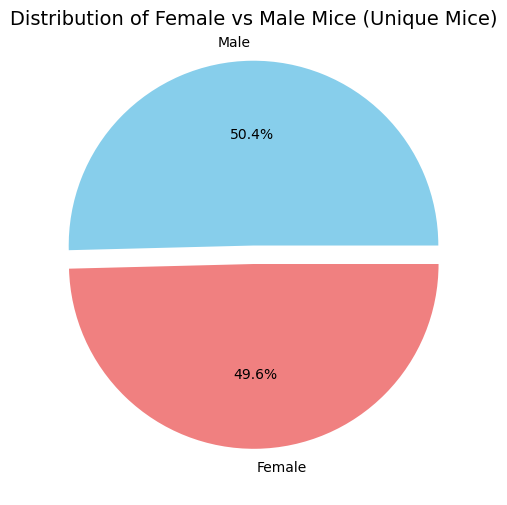

In [15]:
## Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender by dropping duplicates based on Mouse ID
gender_counts = combined_data_cleaned.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart with better styling
gender_pie_pandas = gender_counts.plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(6, 6), 
    colors=['skyblue', 'lightcoral'],  # Adding colors to the slices
    explode=[0.1, 0]  # Slightly explode the first slice (female)
)

# Set the title and make it larger for readability
gender_pie_pandas.set_title("Distribution of Female vs Male Mice (Unique Mice)", fontsize=14)

# Display the plot
plt.ylabel('')  # Hide the 'Sex' label for cleaner visualization
plt.show()



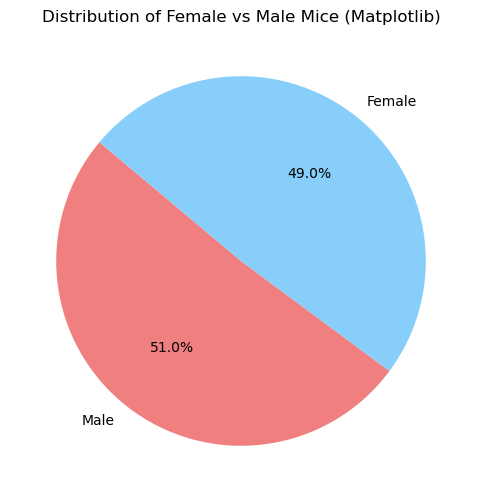

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = combined_data_cleaned["Sex"].value_counts()

# Make the pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140, colors=['lightcoral', 'lightskyblue'])

# Set the title
plt.title("Distribution of Female vs Male Mice (Matplotlib)")

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = combined_data_cleaned.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, combined_data_cleaned, on=["Mouse ID", "Timepoint"])

# Filter the data to only include the four treatments: Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Display the first few rows of the final tumor volume data
final_tumor_volume.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [19]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]
    tumor_data = treatment_data["Tumor Volume (mm3)"]
    
    # Calculate the IQR for the tumor volume data
    quartiles = tumor_data.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    
    # Add tumor data to the list for plotting
    tumor_volumes.append(tumor_data)
    
    # Identify outliers
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    # Display outliers for each treatment with count and specific outlier values
    print(f"{treatment} outliers: {len(outliers)}")
    print(outliers)




Capomulin outliers: 0
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: 0
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 1
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: 0
Series([], Name: Tumor Volume (mm3), dtype: float64)


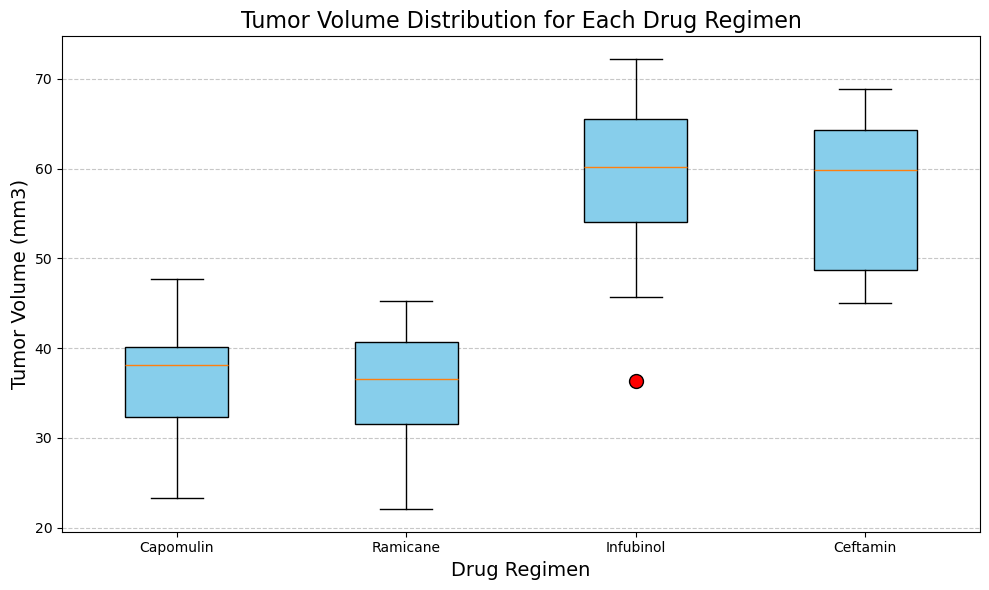

In [20]:
# Generate a box plot showing the distribution of the tumor volume for each treatment group

# Create a box plot for each treatment
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(tumor_volumes, 
            tick_labels=treatment_list, 
            patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=10))  # Outliers in red

# Set labels and title with appropriate font sizes
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.title("Tumor Volume Distribution for Each Drug Regimen", fontsize=16)

# Add a grid to the y-axis for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()



## Line and Scatter Plots

In [22]:
# Check if Mouse ID "k403" exists in the Capomulin treatment group
capomulin_data = combined_data_cleaned[combined_data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_data["Mouse ID"].unique()
print(capomulin_mice)  # Print all unique mouse IDs treated with Capomulin


['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


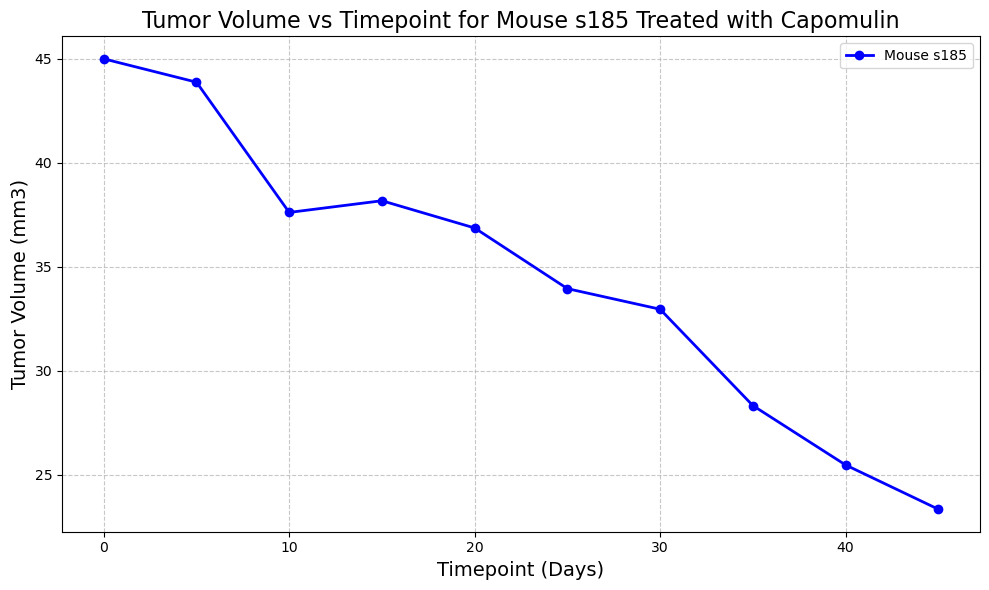

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
mouse_id = "s185"  # Example mouse ID from the list you provided
mouse_data = combined_data_cleaned[combined_data_cleaned["Drug Regimen"] == "Capomulin"]
mouse_data = mouse_data[mouse_data["Mouse ID"] == mouse_id]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b', label=f"Mouse {mouse_id}", linestyle='-', linewidth=2)

# Set labels and title with increased font size
plt.xlabel("Timepoint (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.title(f"Tumor Volume vs Timepoint for Mouse {mouse_id} Treated with Capomulin", fontsize=16)

# Add a legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()




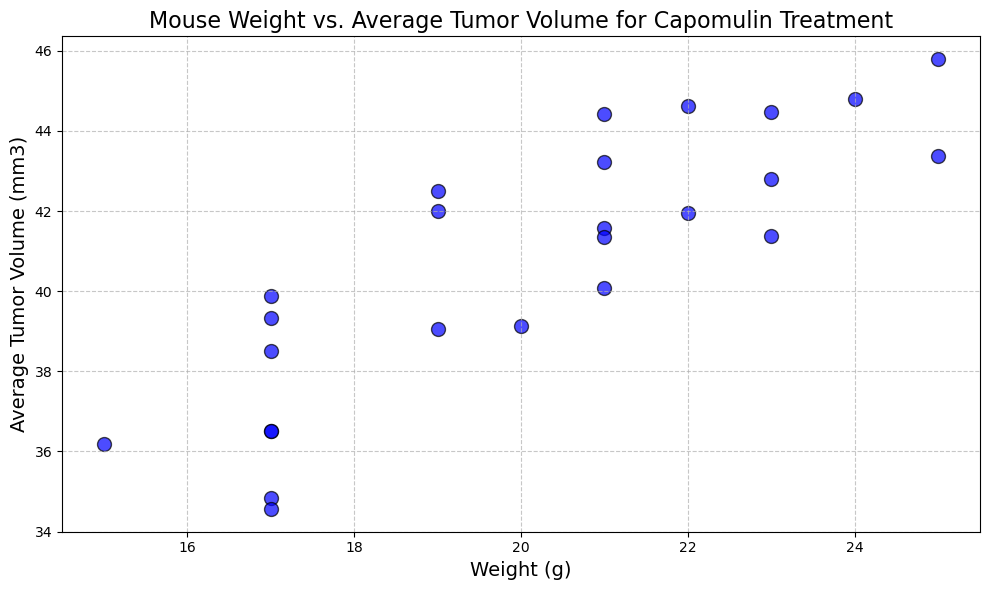

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_data = combined_data_cleaned[combined_data_cleaned["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse treated with Capomulin
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the mouse weights for each mouse treated with Capomulin
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='b', edgecolor='black', s=100, alpha=0.7, marker='o')

# Set labels and title with appropriate font size
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment", fontsize=16)

# Add grid lines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()



## Correlation and Regression

Correlation Coefficient: 0.8419363424694721
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


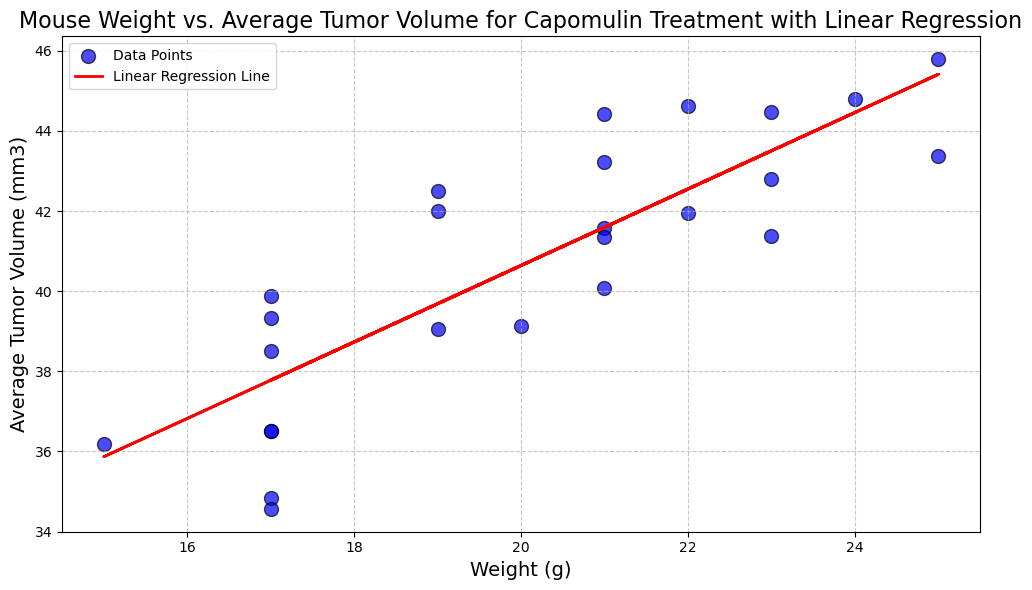

In [26]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Calculate the correlation coefficient (r_value)
correlation_coefficient = r_value

# Create a linear regression line
regression_line = slope * mouse_weights + intercept

# Display the correlation coefficient, p-value, and standard error
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Create a scatter plot and add the regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='b', edgecolor='black', s=100, alpha=0.7, label="Data Points")
plt.plot(mouse_weights, regression_line, color='r', label="Linear Regression Line", linewidth=2)

# Set labels and title with appropriate font size
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Treatment with Linear Regression", fontsize=16)

# Add grid lines to the plot for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()
